In [1]:
import numpy as np
import pylab as plt
import h5py
from torchvision.transforms import v2
import torch
plt.rcParams['font.size'] = 20
from matplotlib.patches import Rectangle

from pita_z.utils import reddening
from pita_z.utils import augmentations

In [2]:
files = ['candels_train_catalog.hdf5', 'candels_val_catalog.hdf5',
             'candels_test_catalog.hdf5']

images, redshifts, ebvs = [], [], []
for file in files:
    path_to_file = '/pscratch/sd/a/ashodkh/image_photo_z/' + file
    with h5py.File(path_to_file, 'r') as f:
        images.append(f['images'][:])
        redshifts.append(f['redshifts'][:])
        ebvs.append(f['ebvs'][:])

images = np.concatenate(images, axis=0)
redshifts = np.concatenate(redshifts, axis=0)
ebvs = np.concatenate(ebvs, axis=0)

In [3]:
reddening_transform = reddening.ReddeningTransform(R=[2.471, 1.526, 0.726, 0.512], redden_aug=False)
idx = 0
test_dr = reddening_transform([images[idx], ebvs[idx]])


In [4]:
band_mads = np.load('/global/homes/a/ashodkh/image_photo_z/notebooks/candels_band_mads.npy')
transforms = v2.Compose([
            v2.RandomHorizontalFlip(0.5),
            v2.RandomRotation(180, interpolation=v2.InterpolationMode.BILINEAR),
            augmentations.JitterCrop(output_dim=64, jitter_lim=4),
            augmentations.AddGaussianNoise(mean=0, std=band_mads)
        ])


Text(0.5, 1.0, 'view 2')

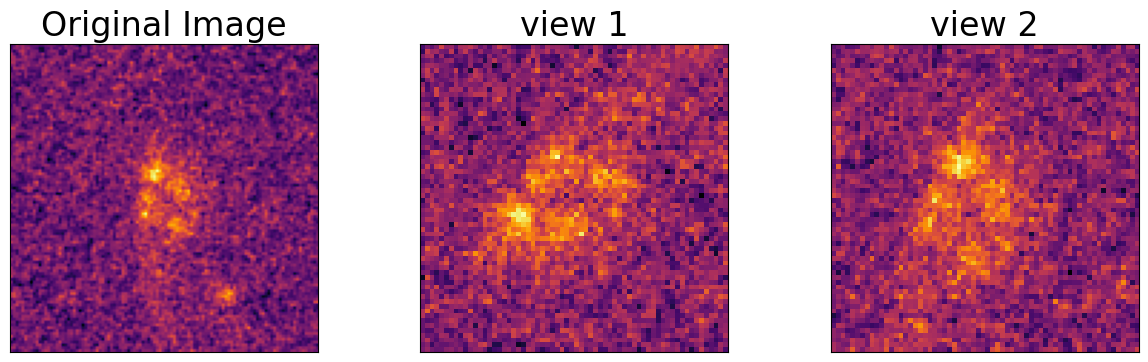

In [5]:
fig, ax = plt.subplots(ncols=3, figsize=(15,4))

ax[0].imshow(images[idx,0,:,:], cmap='inferno')
ax[1].imshow(transforms(torch.tensor(images[idx:idx+1,:,:,:],dtype=torch.float64)).detach().numpy()[0,0,:,:], cmap='inferno')
ax[2].imshow(transforms(torch.tensor(images[idx:idx+1,:,:,:],dtype=torch.float64)).detach().numpy()[0,0,:,:], cmap='inferno')
             
for j in range(3):
    ax[j].set_xticks([])
    ax[j].set_yticks([])

ax[0].set_title('Original Image')
ax[1].set_title('view 1')
ax[2].set_title('view 2')